# 課題8

そのまま課題ファイルで編集しないでください。課題ファイルを複製してから課題を回答してください。

In [ ]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")

## 課題1

以下の図を再現してください

- 年齢の分布を、異なる階級幅を使って、4つのサブプロットをわけて描画する
   - 階級幅を適当で決めてよい
- 各サブプロットには、
    - x軸ラベル、y軸ラベル、サブプロット番号(a-d)を指定する
    - 水平方向のグリッド線を追加する
    - ヒストグラムの色を`lightblue`に変更する

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


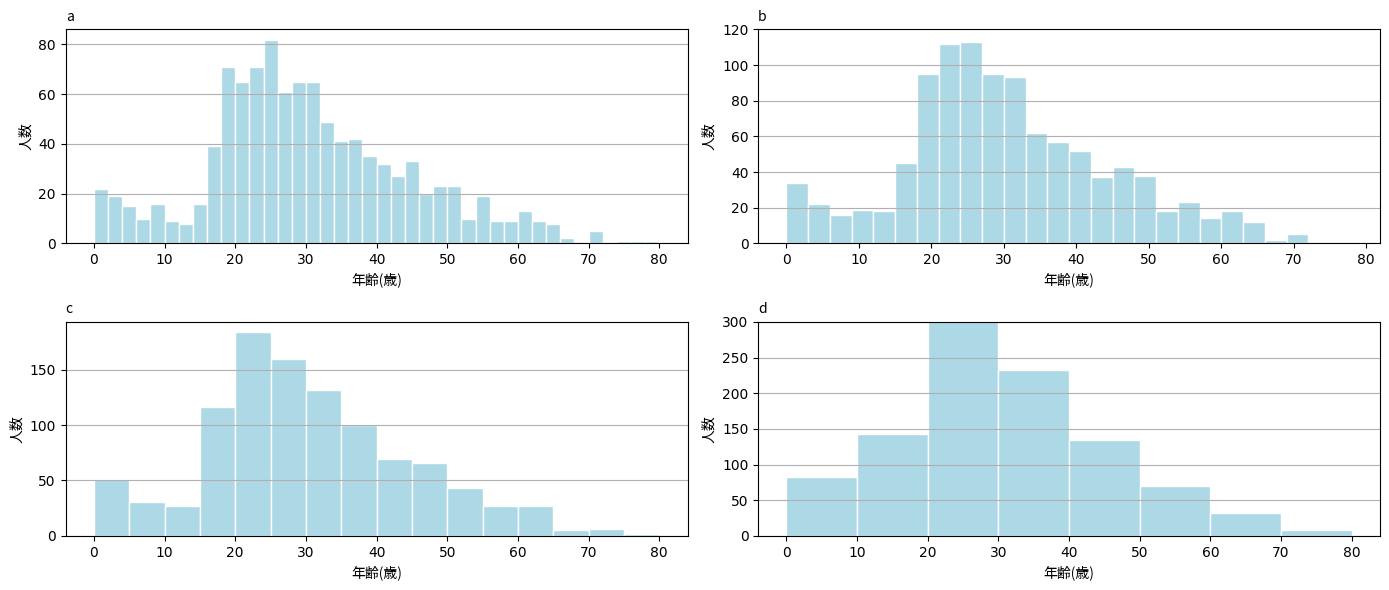

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 扱うデータを読み込む
df = pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")
age = df["age"].dropna()

# 文字化けを解消するために，フォントを指定する
font_path = "/content/drive/MyDrive/CSS/Noto_Sans_JP/static/NotoSansJP-Regular.ttf"
jp_font = fm.FontProperties(fname=font_path)

# グラフ描画
bin_widths = [2, 3, 5, 10]
titles = ['a', 'b', 'c', 'd']

fig, axes = plt.subplots(2, 2, figsize=(14, 6))
axes = axes.flatten()

for i, (ax, width, title) in enumerate(zip(axes, bin_widths, titles)):
    bins = range(0, 81, width)
    ax.hist(age, bins=bins, color='lightblue', edgecolor='white')
    ax.set_title(f"{title}", loc='left', fontsize=14, fontproperties=jp_font)
    ax.set_xlabel("年齢(歳)", fontproperties=jp_font)
    ax.set_ylabel("人数", fontproperties=jp_font)
    ax.grid(axis='y')

    if i == 1:
        ax.set_ylim(0, 120)
    if i == 3:
        ax.set_ylim(0, 300)

plt.tight_layout()
plt.show()

![](./Figure1.png)

## 課題2

以下の図を再現してください

- 男性乗客と女性乗客の年齢の分布をそれぞれ描画する
- 全乗客の年齢分布を示す灰色ヒストグラムも描画する
- 図のタイトル、x軸ラベル、y軸ラベル、凡例を設定する

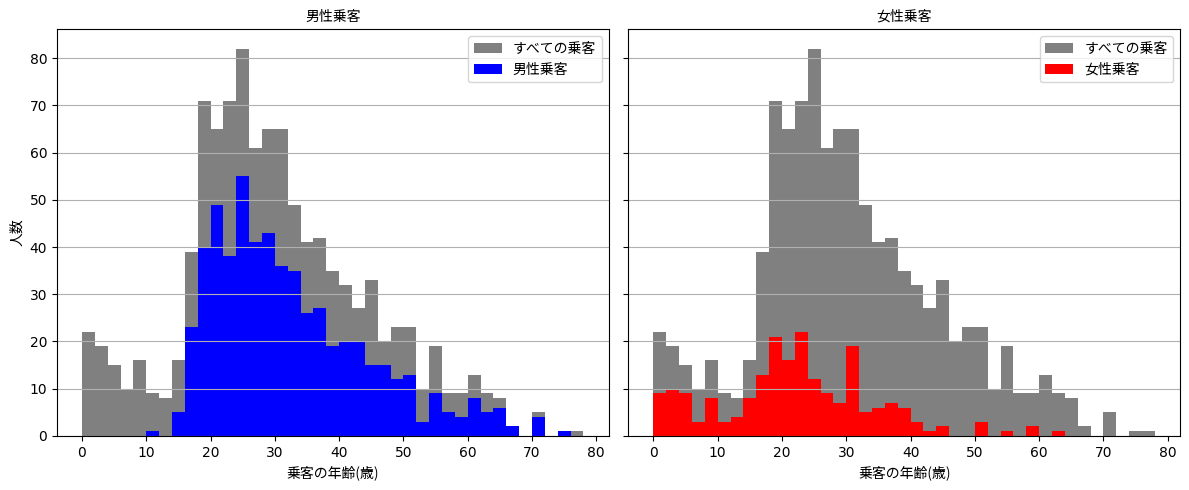

In [ ]:
# データ読み込み
df = pd.read_csv("https://raw.githubusercontent.com/lvzeyu/css_tohoku/master/css_tohoku/draft/Data/titanic.csv")
df = df.dropna(subset=["age", "sex"])  #

# 年齢データ
all_ages = df["age"]
mr_ages = df[df["name"].str.contains("Mr\.")]["age"]
miss_ages = df[df["name"].str.contains("Miss\.")]["age"]

# グラフ描画
bins = range(0, 80, 2)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].hist(all_ages, bins=bins, color='gray', label="すべての乗客")
axes[0].hist(mr_ages, bins=bins, color='blue', label="男性乗客")
axes[0].set_title("男性乗客", fontproperties=jp_font)
axes[0].set_xlabel("乗客の年齢(歳)", fontproperties=jp_font)
axes[0].set_ylabel("人数", fontproperties=jp_font)
axes[0].legend(prop=jp_font)
axes[0].grid(axis='y')

axes[1].hist(all_ages, bins=bins, color='gray', label="すべての乗客")
axes[1].hist(miss_ages, bins=bins, color='red', label="女性乗客")
axes[1].set_title("女性乗客", fontproperties=jp_font)
axes[1].set_xlabel("乗客の年齢(歳)", fontproperties=jp_font)
axes[1].legend(prop=jp_font)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()